Applying KMeans with c=1 on Standardized Data


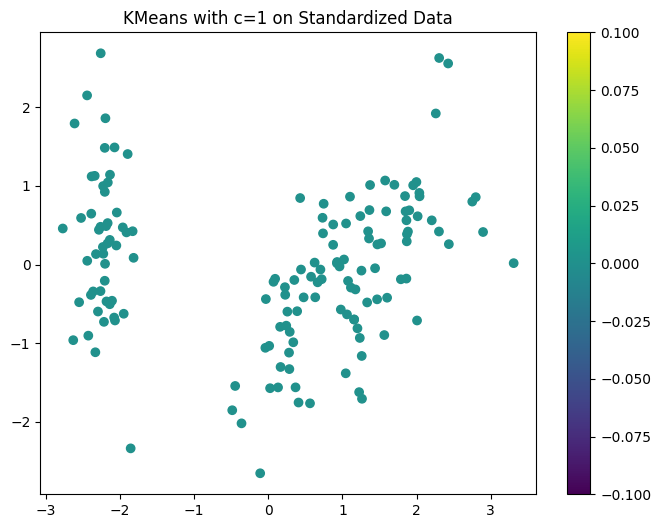

Applying KMeans with c=3 on Standardized Data


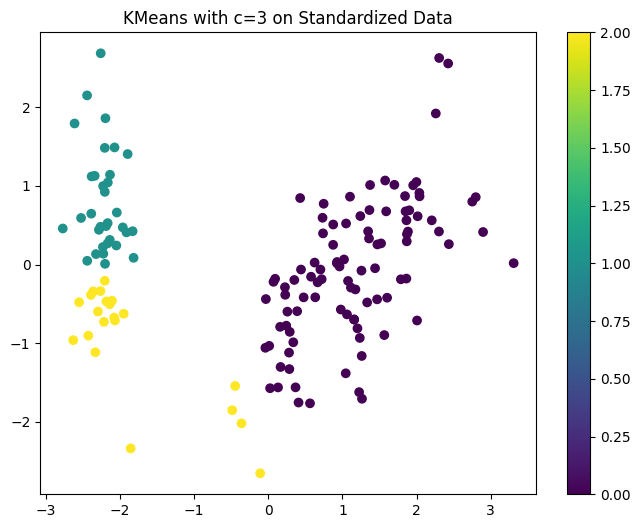

Applying KMeans with c=5 on Standardized Data


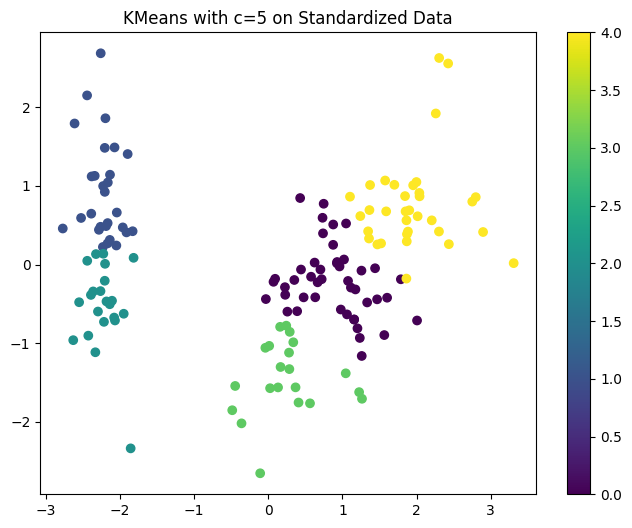

Applying DBSCAN with c=1 on Standardized Data


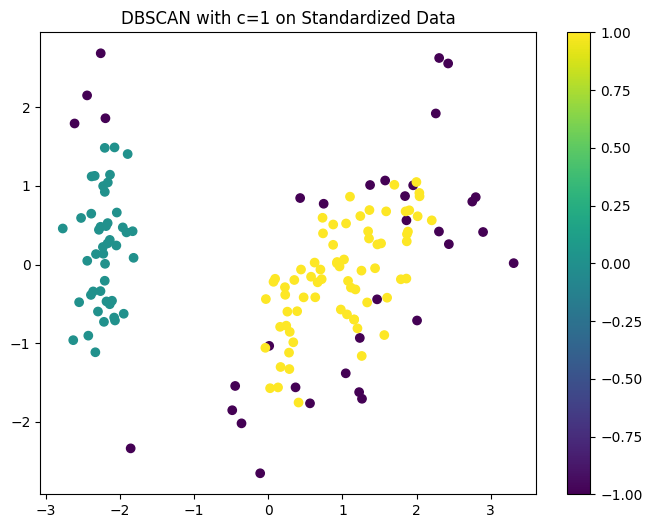

Applying DBSCAN with c=3 on Standardized Data


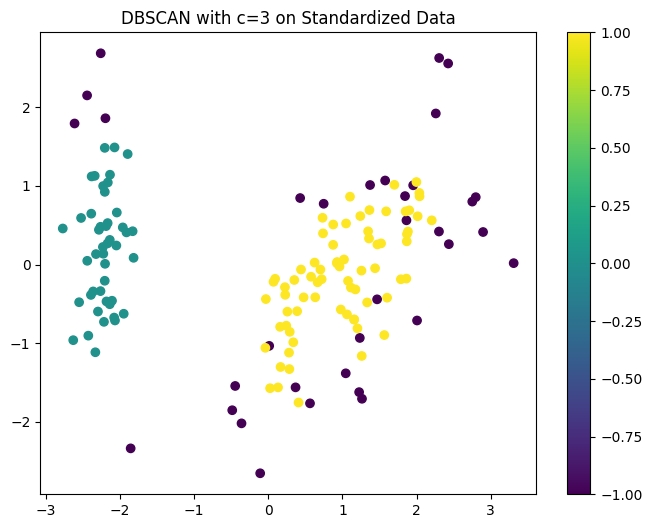

Applying DBSCAN with c=5 on Standardized Data


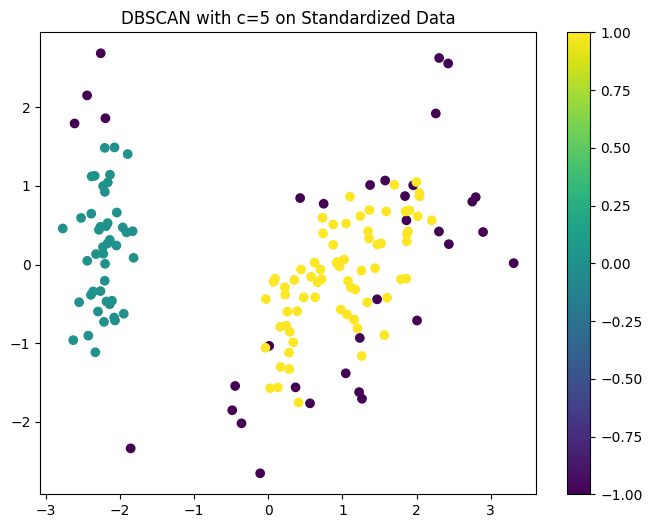

Applying Agglomerative with c=1 on Standardized Data


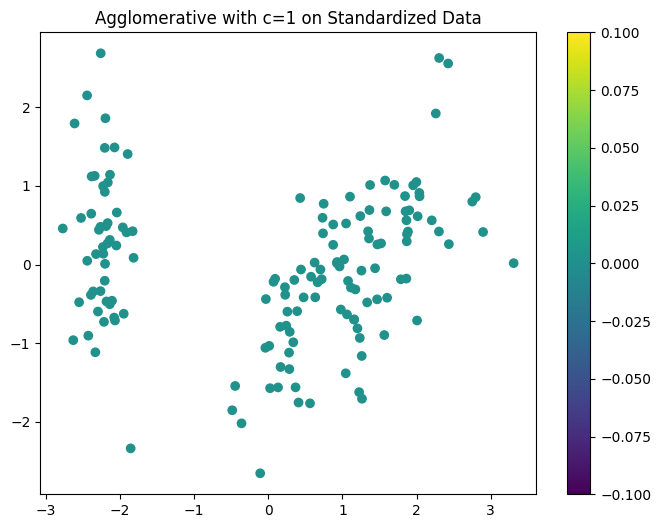

Applying Agglomerative with c=3 on Standardized Data


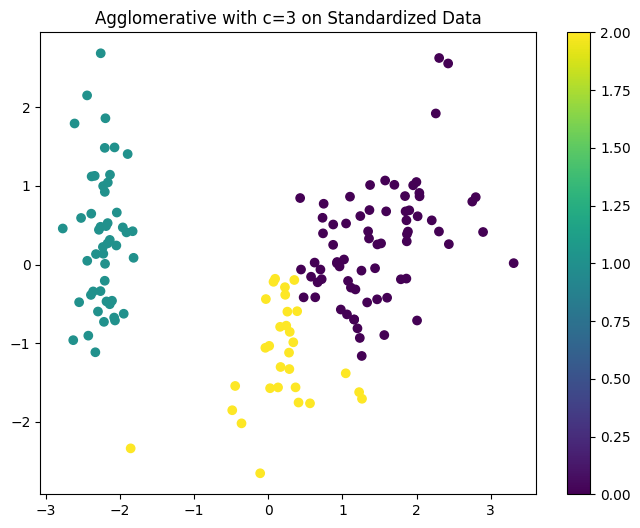

Applying Agglomerative with c=5 on Standardized Data


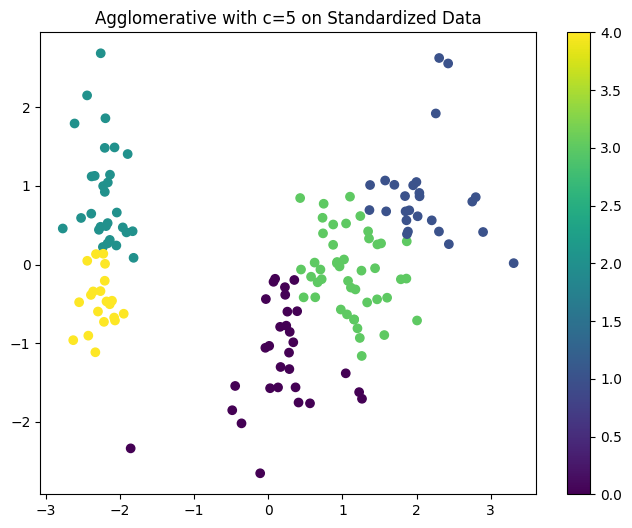

Applying KMeans with c=1 on Normalized Data


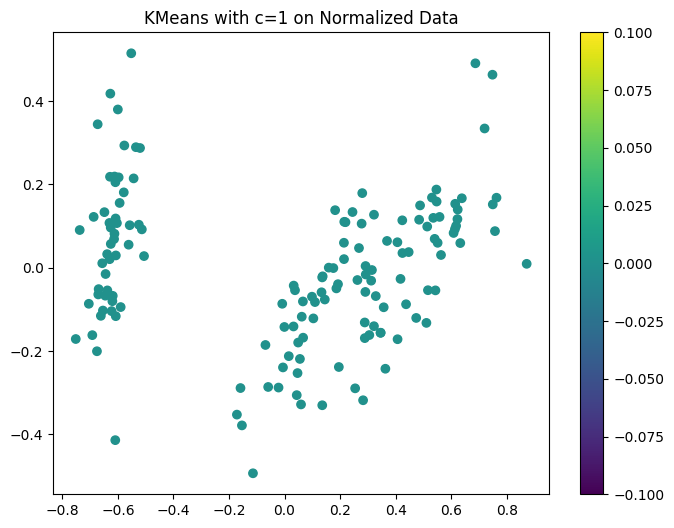

Applying KMeans with c=3 on Normalized Data


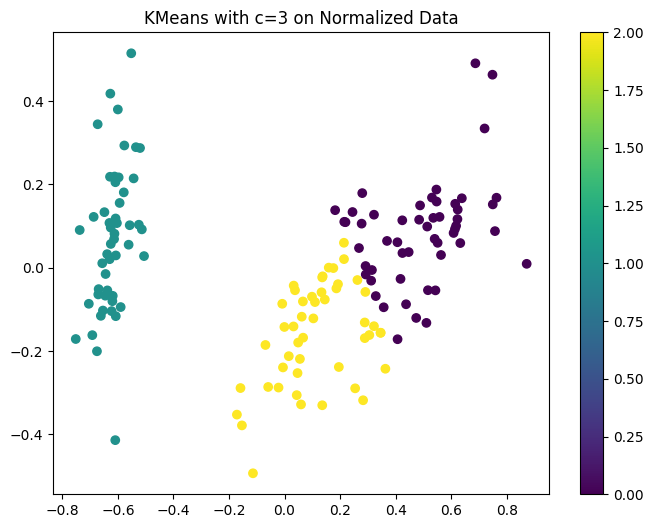

Applying KMeans with c=5 on Normalized Data


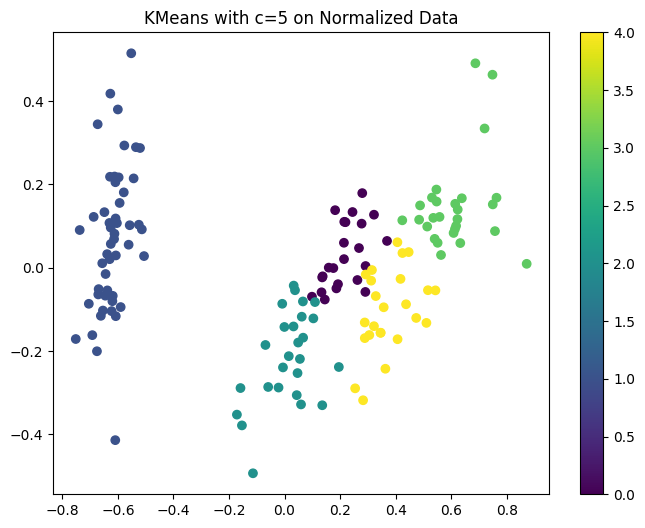

Applying DBSCAN with c=1 on Normalized Data


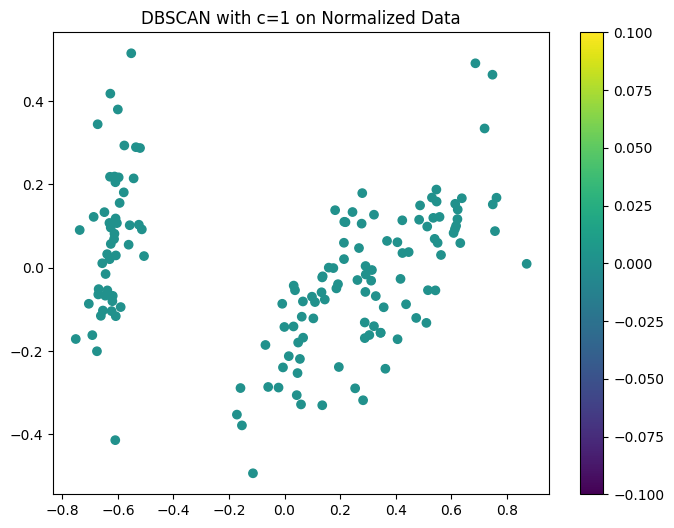

Applying DBSCAN with c=3 on Normalized Data


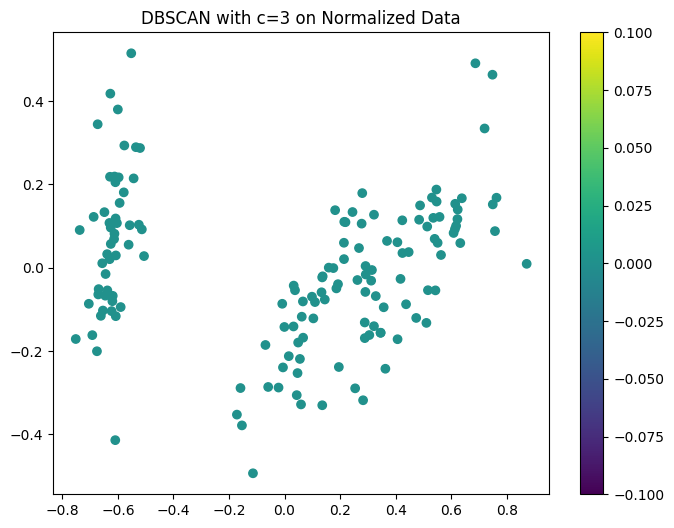

Applying DBSCAN with c=5 on Normalized Data


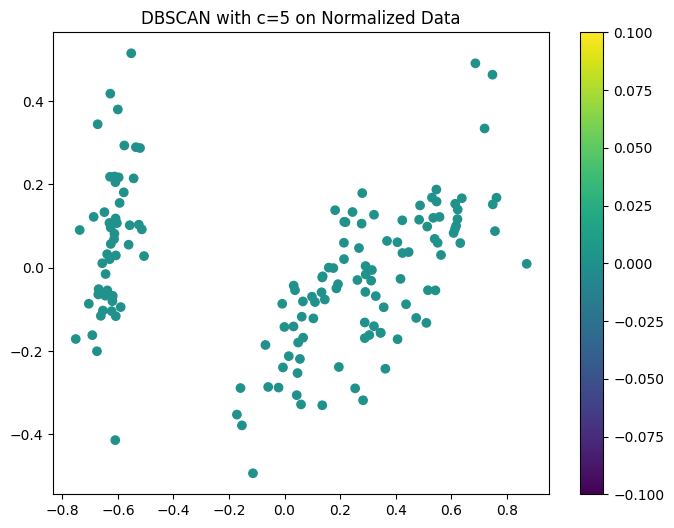

Applying Agglomerative with c=1 on Normalized Data


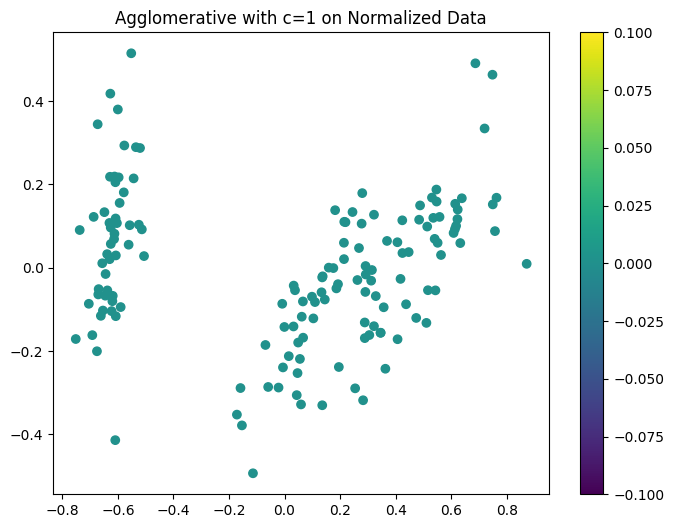

Applying Agglomerative with c=3 on Normalized Data


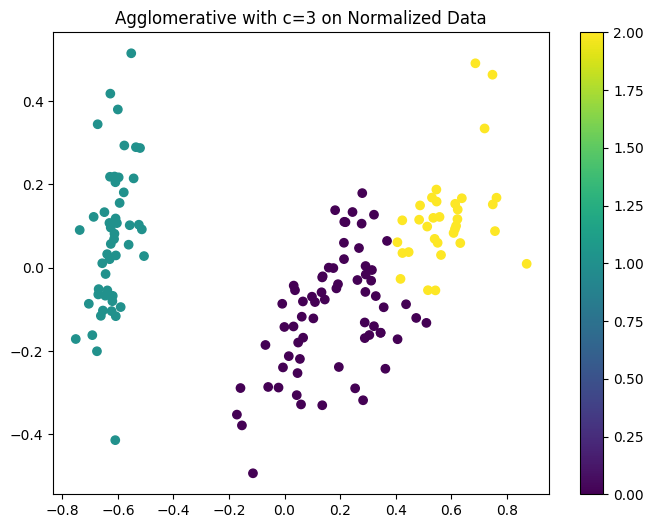

Applying Agglomerative with c=5 on Normalized Data


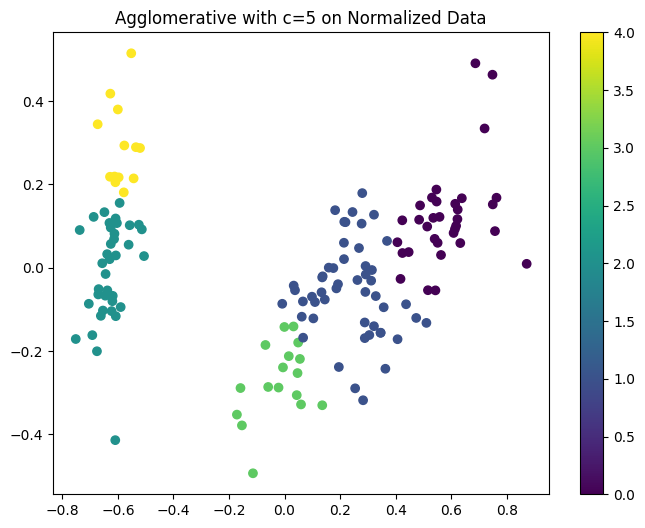

Applying KMeans with c=1 on PCA Data


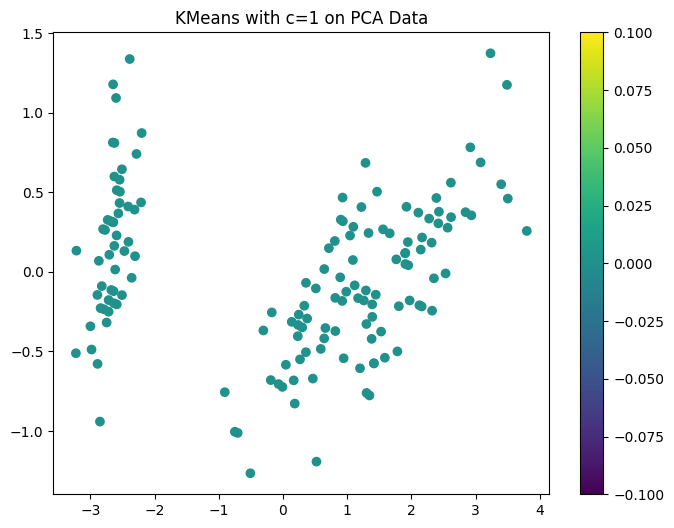

Applying KMeans with c=3 on PCA Data


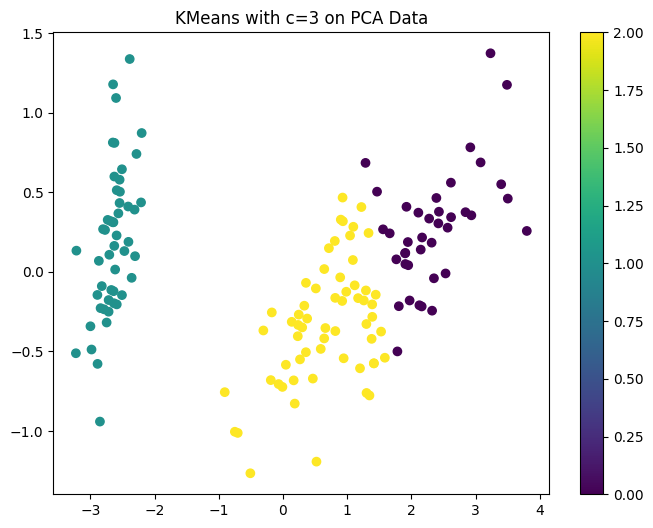

Applying KMeans with c=5 on PCA Data


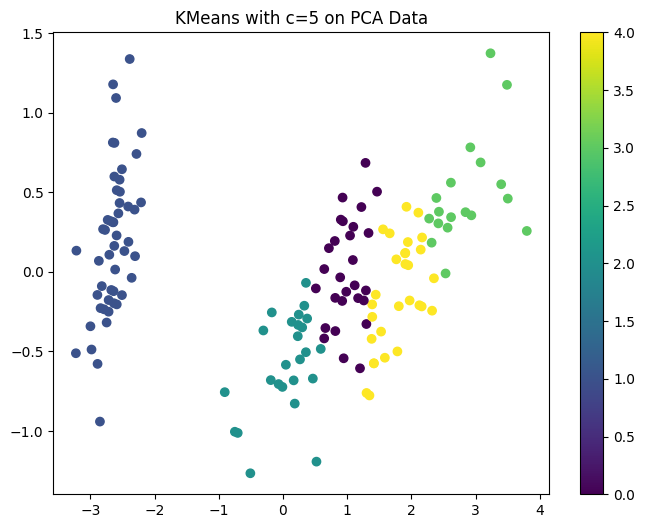

Applying DBSCAN with c=1 on PCA Data


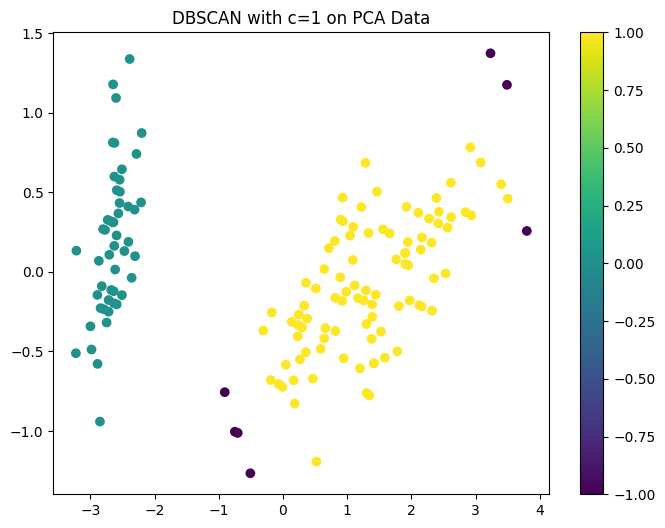

Applying DBSCAN with c=3 on PCA Data


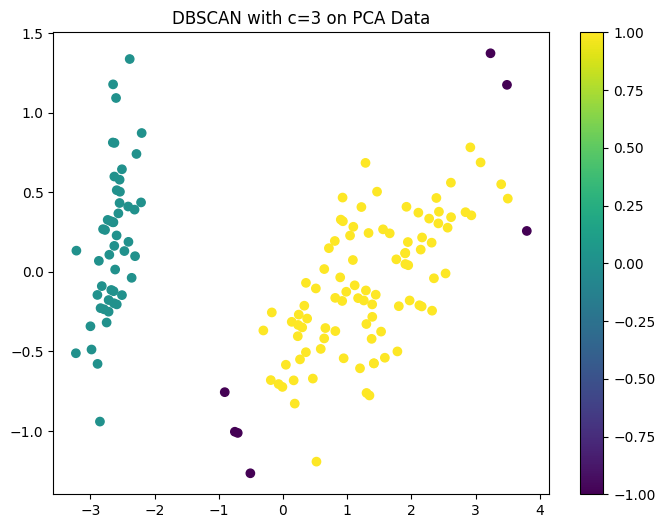

Applying DBSCAN with c=5 on PCA Data


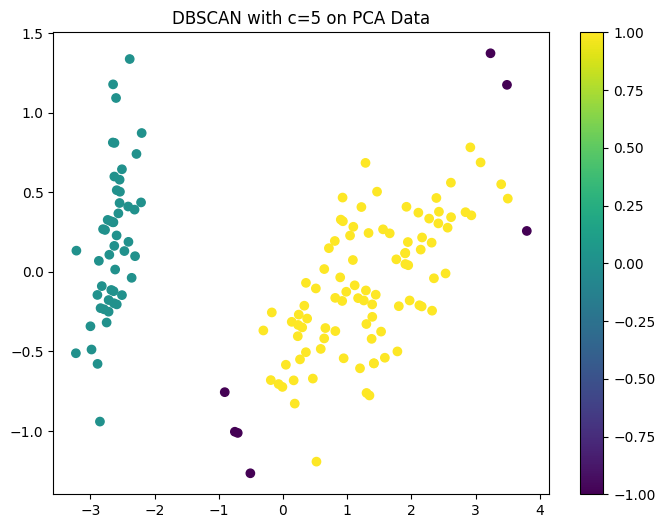

Applying Agglomerative with c=1 on PCA Data


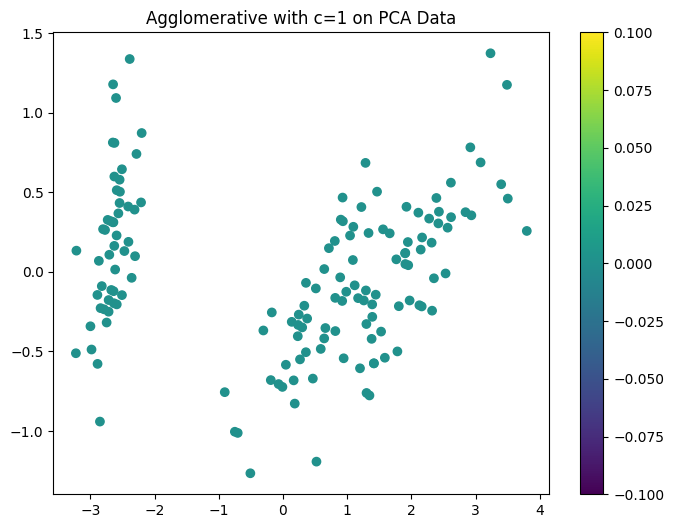

Applying Agglomerative with c=3 on PCA Data


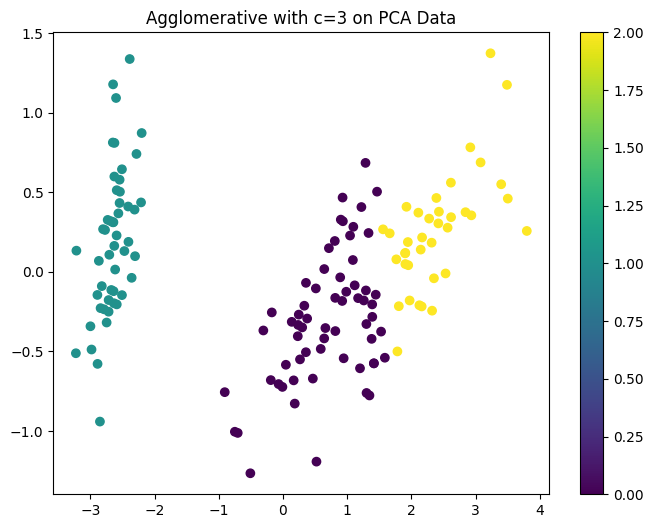

Applying Agglomerative with c=5 on PCA Data


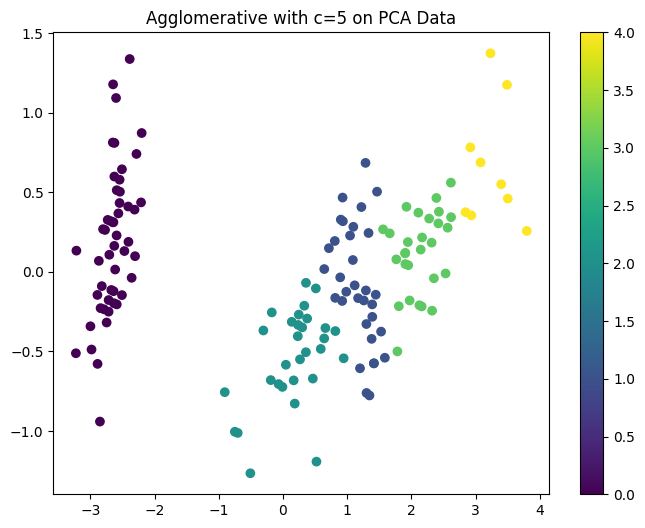


Clustering Evaluation Results:
    Algorithm Preprocessing  Clusters  Silhouette Score  Davies-Bouldin Score  Calinski-Harabasz Score
       KMeans  Standardized         1         -1.000000             -1.000000                -1.000000
       KMeans  Standardized         3          0.479881              0.789363               157.360153
       KMeans  Standardized         5          0.345033              0.943894               202.635850
       DBSCAN  Standardized         1          0.356516              7.124057                84.510330
       DBSCAN  Standardized         3          0.356516              7.124057                84.510330
       DBSCAN  Standardized         5          0.356516              7.124057                84.510330
Agglomerative  Standardized         1         -1.000000             -1.000000                -1.000000
Agglomerative  Standardized         3          0.446689              0.803467               222.719164
Agglomerative  Standardized         5    

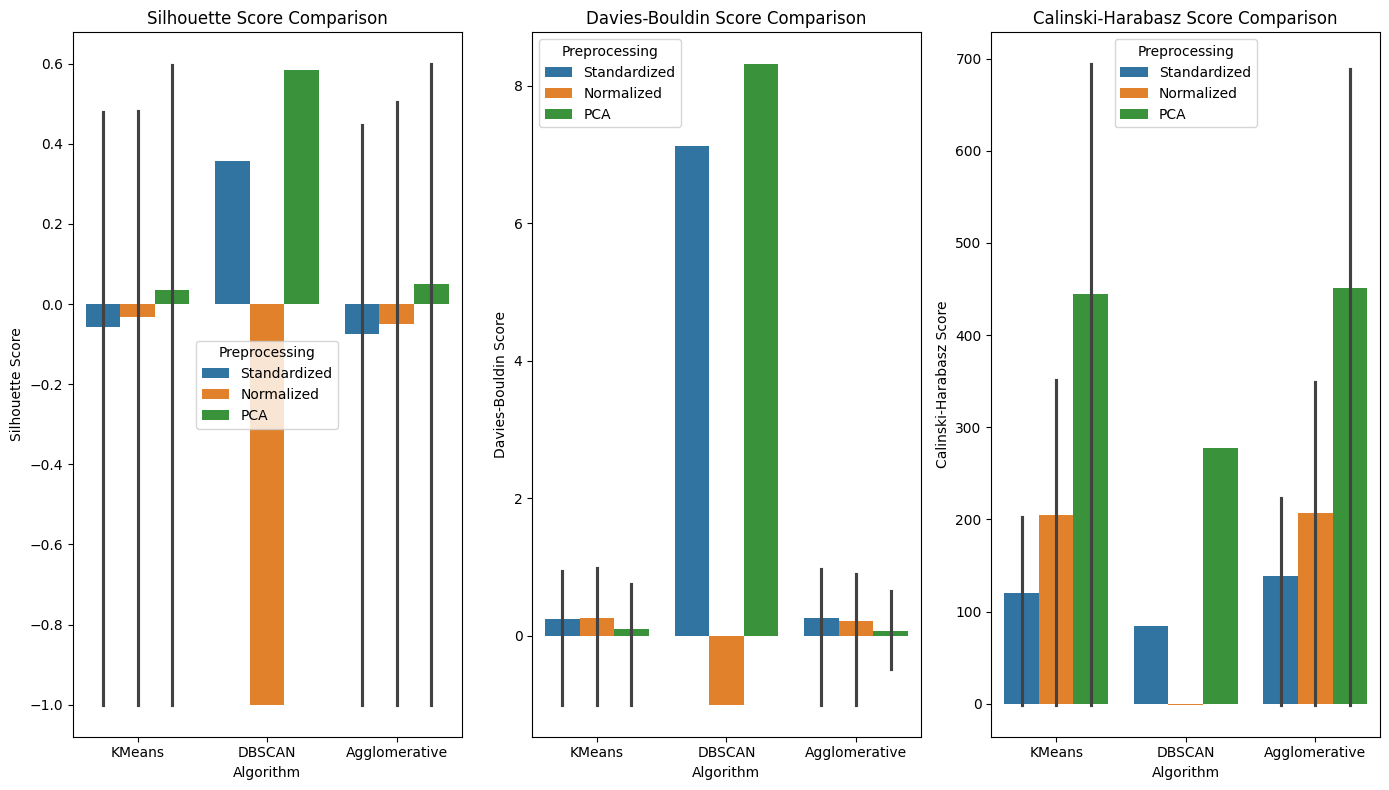


### Conclusion:
Based on the clustering results:
- **KMeans**: Works well with normalized data but may be sensitive to the choice of `k` (clusters).
- **DBSCAN**: Needs careful tuning of `eps` and `min_samples` and might not perform well if clusters are not well-separated.
- **Agglomerative**: Performs well with hierarchical data and works well for smaller datasets.

### Results Interpretation:
- **Silhouette Score**: Higher values indicate better separation of clusters.
- **Davies-Bouldin Index**: Lower values indicate better clustering quality.
- **Calinski-Harabasz Index**: Higher values indicate more distinct clusters.

The results should guide you in selecting the best preprocessing, clustering algorithm, and hyperparameter settings for the Iris dataset.



In [9]:
# Step 1: Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import datasets
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.cluster import KMeans, DBSCAN, AgglomerativeClustering
from sklearn.metrics import silhouette_score, davies_bouldin_score, calinski_harabasz_score
from sklearn.decomposition import PCA

# Step 2: Load the Iris dataset from sklearn
iris = datasets.load_iris()
X = iris.data
y = iris.target

# Step 3: Preprocessing techniques

# Standardization
scaler = StandardScaler()
X_standardized = scaler.fit_transform(X)

# Normalization
normalizer = MinMaxScaler()
X_normalized = normalizer.fit_transform(X)

# Apply PCA to reduce data to 2 components for visualization
def apply_pca(X):
    pca = PCA(n_components=2)
    return pca.fit_transform(X)

# Step 4: Clustering Algorithms

# 1. KMeans Clustering
def kmeans_clustering(X, n_clusters=3):
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    y_kmeans = kmeans.fit_predict(X)
    return kmeans, y_kmeans

# 2. DBSCAN
def dbscan_clustering(X, eps=0.5, min_samples=5):
    dbscan = DBSCAN(eps=eps, min_samples=min_samples)
    y_dbscan = dbscan.fit_predict(X)
    return dbscan, y_dbscan

# 3. Agglomerative Clustering
def agglomerative_clustering(X, n_clusters=3):
    agg = AgglomerativeClustering(n_clusters=n_clusters)
    y_agg = agg.fit_predict(X)
    return agg, y_agg

# Step 5: Evaluation Metrics
def evaluate_clustering(X, y_pred):
    # Silhouette Score: Only works if there are at least two clusters
    if len(set(y_pred)) > 1:  # Ensure at least 2 clusters
        silhouette = silhouette_score(X, y_pred)
    else:
        silhouette = -1  # If only one cluster is found, return -1

    # Davies-Bouldin Index: Also requires at least two clusters
    if len(set(y_pred)) > 1:
        davies_bouldin = davies_bouldin_score(X, y_pred)
    else:
        davies_bouldin = -1  # If only one cluster is found, return -1

    # Calinski-Harabasz Index: Measures between-cluster and within-cluster dispersion
    if len(set(y_pred)) > 1:
        calinski_harabasz = calinski_harabasz_score(X, y_pred)
    else:
        calinski_harabasz = -1

    return silhouette, davies_bouldin, calinski_harabasz

# Step 6: Apply PCA for dimensionality reduction for better visualization
def pca_visualization(X, y_pred, title="PCA Plot"):
    pca = PCA(n_components=2)
    X_pca = pca.fit_transform(X)
    plt.figure(figsize=(8, 6))
    plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y_pred, cmap='viridis')
    plt.title(title)
    plt.colorbar()
    plt.show()

# Step 7: Apply Clustering on Different Preprocessed Data
results = []

# List of clustering algorithms to test
clustering_algorithms = [("KMeans", kmeans_clustering),
                         ("DBSCAN", dbscan_clustering),
                         ("Agglomerative", agglomerative_clustering)]

# Test different values of c (1, 3, 5) for KMeans and Agglomerative Clustering
cluster_values = [1, 3, 5]

# Step 7.1: Apply clustering on Standardized Data
for name, cluster_func in clustering_algorithms:
    for c in cluster_values:
        print(f"Applying {name} with c={c} on Standardized Data")
        if name == "DBSCAN":
            model, y_pred = cluster_func(X_standardized, eps=0.5, min_samples=5)
        else:
            model, y_pred = cluster_func(X_standardized, n_clusters=c)

        silhouette, davies_bouldin, calinski_harabasz = evaluate_clustering(X_standardized, y_pred)
        results.append([name, 'Standardized', c, silhouette, davies_bouldin, calinski_harabasz])
        pca_visualization(X_standardized, y_pred, title=f'{name} with c={c} on Standardized Data')

# Step 7.2: Apply clustering on Normalized Data
for name, cluster_func in clustering_algorithms:
    for c in cluster_values:
        print(f"Applying {name} with c={c} on Normalized Data")
        if name == "DBSCAN":
            model, y_pred = cluster_func(X_normalized, eps=0.5, min_samples=5)
        else:
            model, y_pred = cluster_func(X_normalized, n_clusters=c)

        silhouette, davies_bouldin, calinski_harabasz = evaluate_clustering(X_normalized, y_pred)
        results.append([name, 'Normalized', c, silhouette, davies_bouldin, calinski_harabasz])
        pca_visualization(X_normalized, y_pred, title=f'{name} with c={c} on Normalized Data')

# Step 7.3: Apply clustering on PCA-transformed Data
X_pca = apply_pca(X)  # Apply PCA to reduce the data

for name, cluster_func in clustering_algorithms:
    for c in cluster_values:
        print(f"Applying {name} with c={c} on PCA Data")
        if name == "DBSCAN":
            model, y_pred = cluster_func(X_pca, eps=0.5, min_samples=5)
        else:
            model, y_pred = cluster_func(X_pca, n_clusters=c)

        silhouette, davies_bouldin, calinski_harabasz = evaluate_clustering(X_pca, y_pred)
        results.append([name, 'PCA', c, silhouette, davies_bouldin, calinski_harabasz])
        pca_visualization(X_pca, y_pred, title=f'{name} with c={c} on PCA Data')

# Step 8: Results Summary
results_df = pd.DataFrame(results, columns=["Algorithm", "Preprocessing", "Clusters", "Silhouette Score", "Davies-Bouldin Score", "Calinski-Harabasz Score"])

# Display results
print("\nClustering Evaluation Results:")
print(results_df.to_string(index=False))  # Display the table without the index

# Step 9: Plot the evaluation metrics
plt.figure(figsize=(14, 8))

# Silhouette Score Plot
plt.subplot(1, 3, 1)
sns.barplot(x="Algorithm", y="Silhouette Score", hue="Preprocessing", data=results_df)
plt.title("Silhouette Score Comparison")

# Davies-Bouldin Score Plot
plt.subplot(1, 3, 2)
sns.barplot(x="Algorithm", y="Davies-Bouldin Score", hue="Preprocessing", data=results_df)
plt.title("Davies-Bouldin Score Comparison")

# Calinski-Harabasz Score Plot
plt.subplot(1, 3, 3)
sns.barplot(x="Algorithm", y="Calinski-Harabasz Score", hue="Preprocessing", data=results_df)
plt.title("Calinski-Harabasz Score Comparison")

plt.tight_layout()
plt.show()